In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd


# I.Download the data

# We choose the currencies pair
ticker = "EURUSD=X"
ticker2 = "GBPUSD=X"
ticker3 = "USDJPY=X"
# The period of time
start_date = "2010-01-01"
end_date = "2013-01-01"

# We download the related data
df=yf.download([ticker],start=start_date, end=end_date)
df2=yf.download([ticker2],start=start_date, end=end_date)
df3=yf.download([ticker3],start=start_date, end=end_date)


# We reset the index to harmonize the 3 df for joining
df=df.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()

# we join the 3 dataframes on their column "Date" that we set as their index
dftot=df.set_index("Date").join(df2.set_index("Date")).join(df3.set_index("Date"))
# We drop the useless columns
dftot.drop("Volume", axis=1, inplace=True)


# Here we want to fill the missing values
min_date = dftot.index.min() # We take the first and last date
max_date = dftot.index.max()
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D') # We create a range with every day including the weekend

# We reindex the dataframe on this range
df = dftot.reindex(full_date_range)
# Because the weekends and holidays dont have any values we fill them with the 7 days rolling mean
df = df.fillna(df.rolling(7,min_periods=1).mean())

# We download the data as csv
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/df.csv', index=False)
print("Files saved in Google Drive!")



/tmp/ipython-input-4207492896.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download([ticker],start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4207492896.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2=yf.download([ticker2],start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4207492896.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df3=yf.download([ticker3],start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4207492896.py:31: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dftot.drop("Volume", axis=1, inplace=True)


Mounted at /content/drive
Files saved in Google Drive!


In [ ]:
df

Price,Close,High,Low,Open,Close,High,Low,Open,Close,High,Low,Open
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,USDJPY=X,USDJPY=X,USDJPY=X,USDJPY=X
2010-01-01,1.438994,1.440196,1.432706,1.432706,1.613294,1.618202,1.613111,1.618202,92.919998,93.089996,92.919998,92.940002
2010-01-02,1.438994,1.440196,1.432706,1.432706,1.613294,1.618202,1.613111,1.618202,92.919998,93.089996,92.919998,92.940002
2010-01-03,1.438994,1.440196,1.432706,1.432706,1.613294,1.618202,1.613111,1.618202,92.919998,93.089996,92.919998,92.940002
2010-01-04,1.442398,1.445191,1.426208,1.431004,1.611370,1.623904,1.606503,1.613710,92.495003,93.200996,92.196999,92.760002
2010-01-05,1.436596,1.448310,1.435194,1.442710,1.599079,1.615587,1.597010,1.611863,91.584999,92.486000,91.282997,92.470001
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1.322576,1.328551,1.321493,1.322751,1.612643,1.620220,1.612643,1.612643,85.667999,86.124001,85.601997,85.677002
2012-12-28,1.325030,1.325732,1.316638,1.324854,1.611603,1.615248,1.608441,1.611603,86.507004,86.537003,85.940002,86.499001
2012-12-29,1.320379,1.324649,1.318053,1.320487,1.613357,1.617556,1.609150,1.613258,85.285001,85.584401,85.058002,85.276999


In [ ]:
# II. Analyzing the data
# We compute the returns
returns=df['Close'].pct_change()
# We compute the annualized 30 days rolling standard deviation
std30=returns.rolling(30).std() * np.sqrt(252)
# We compute the annualized 30 days rolling standard deviation
std90=returns.rolling(90).std() * np.sqrt(252)
# We compute the 20 days rolling mean
sma20=returns.rolling(20).mean()
# We compute the 20 days rolling mean
sma50=returns.rolling(50).std()
# Computing the Relative Strength Index
gain = returns.clip(lower=0).rolling(14).mean() #doing the mean of positive returns on a 14 day basis
loss = -returns.clip(upper=0).rolling(14).mean() #doing the mean of negative returns on a 14 day basis
rs = gain / loss #relative strenght
rsi = 100 - (100 / (1 + rs)) #relative strenght index formula


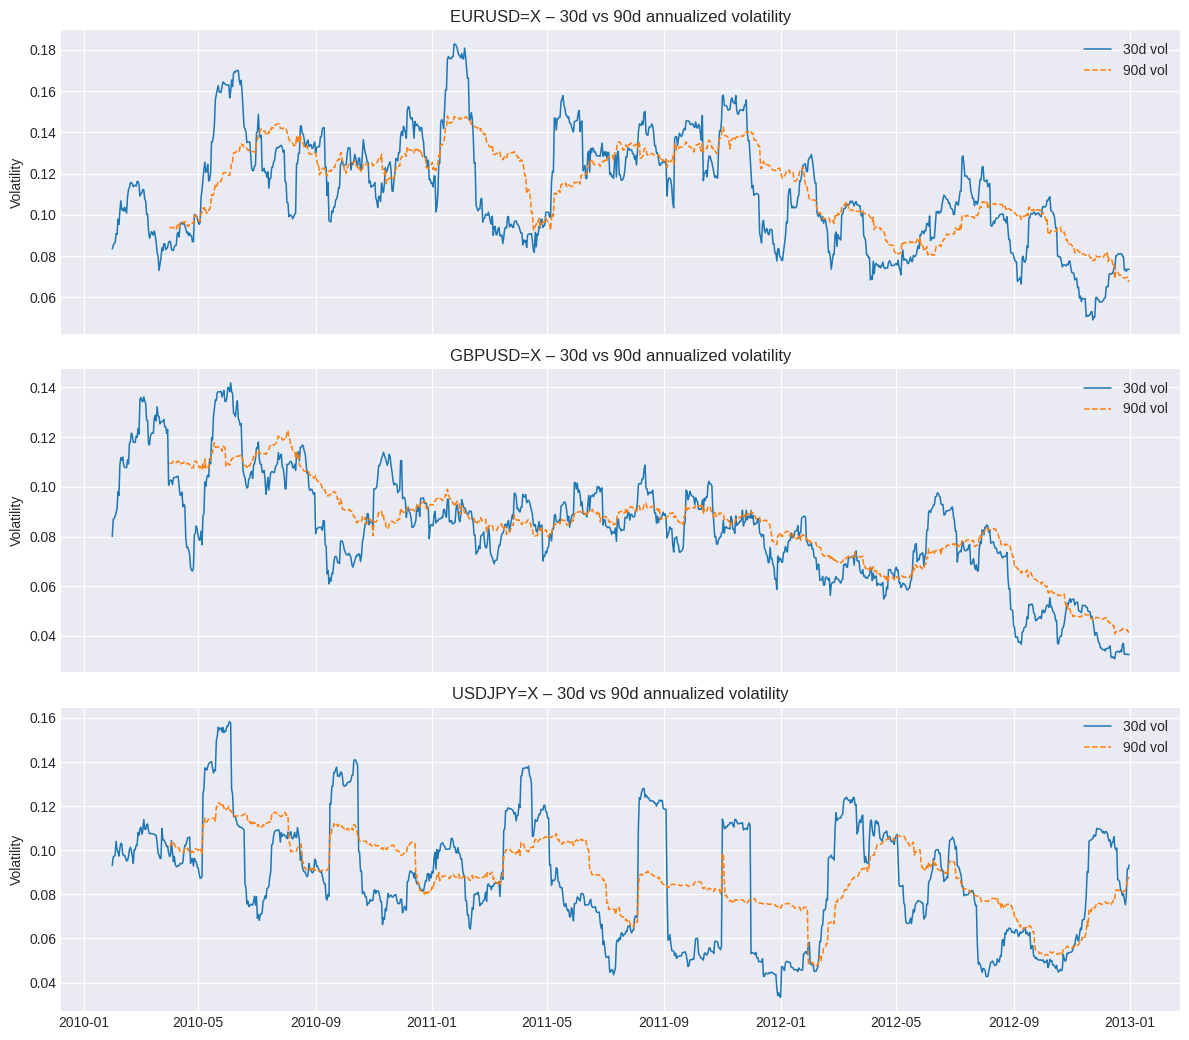

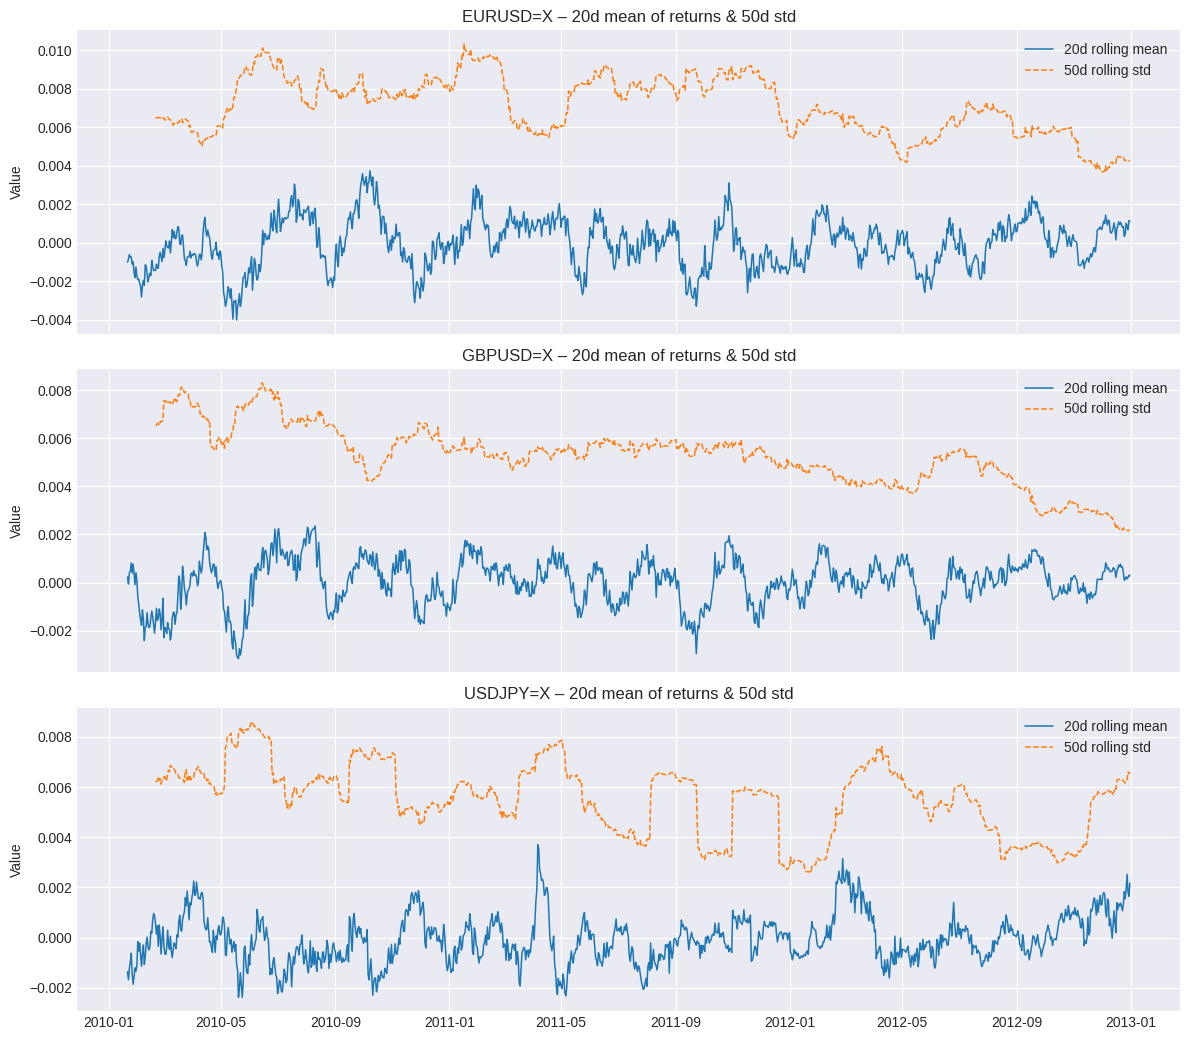

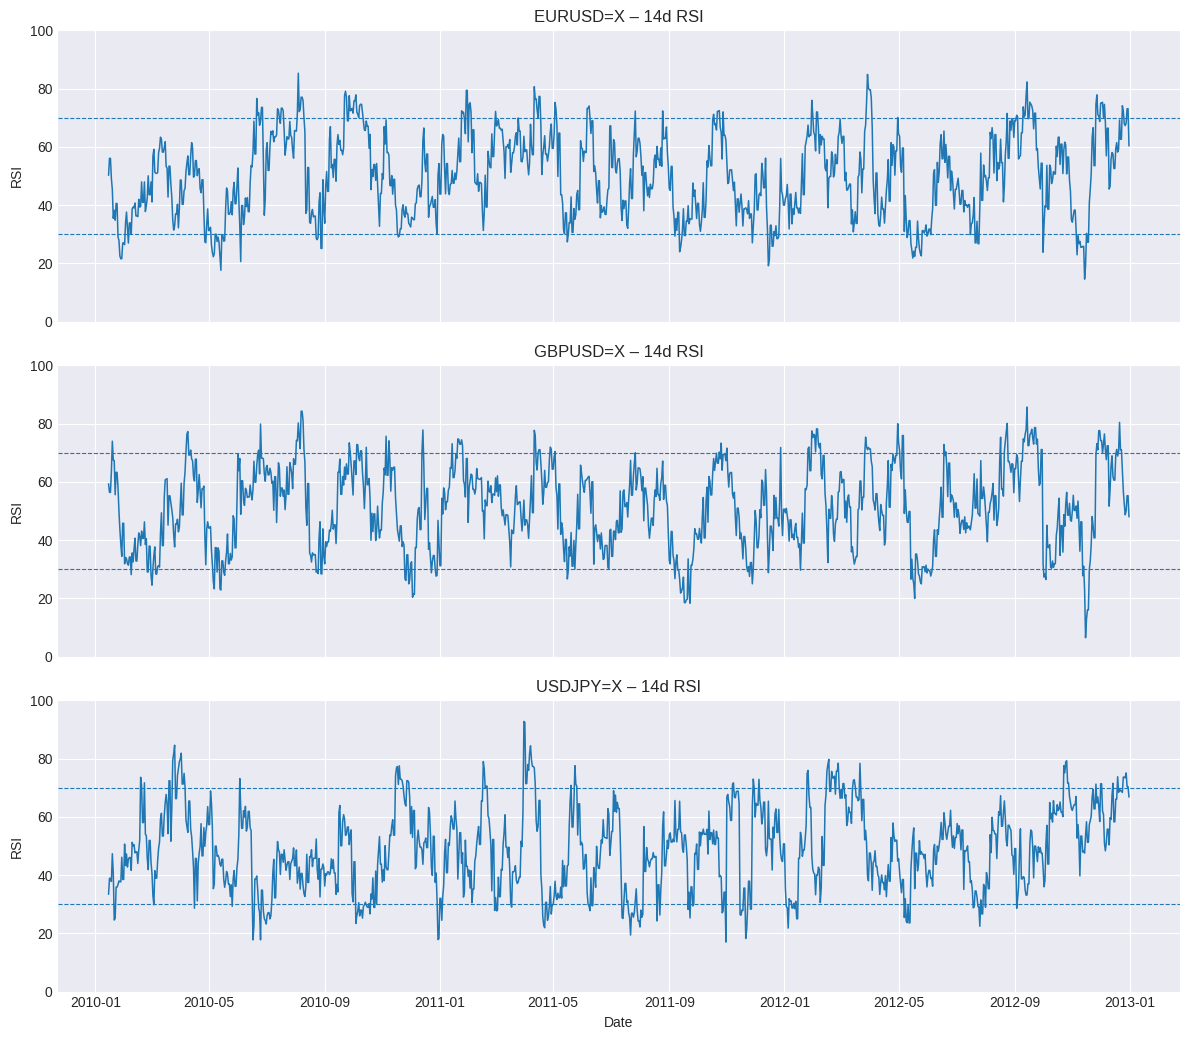

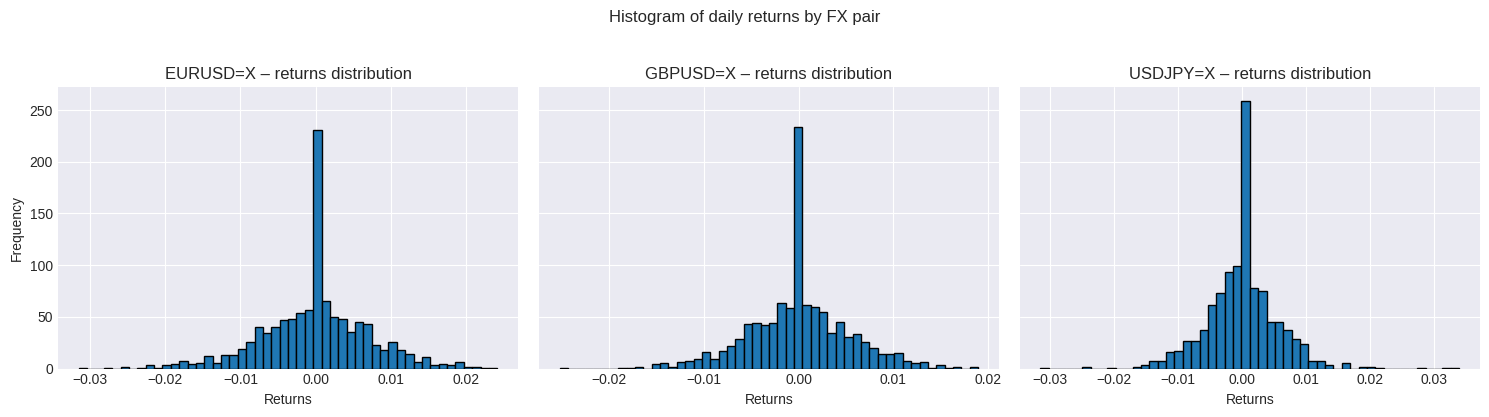

In [ ]:
# III. Visualizing the data

import matplotlib.pyplot as plt

# Use of style for all plots
plt.style.use("seaborn-v0_8-darkgrid")

# List of FX pairs = column names of the returns DataFrame
tickers = returns.columns


# 1) 30d vs 90d rolling volatility (one subplot per FX pair)

fig, axes = plt.subplots(
    len(tickers),           # one row per FX pair
    1,                      # one column
    figsize=(12, 3.5 * len(tickers)),
    sharex=True             # all subplots share the same x-axis (dates)
)

# If there is only one ticker, axes is a single object → wrap it in a list
if len(tickers) == 1:
    axes = [axes]

for i, t in enumerate(tickers):
    ax = axes[i]                          # current subplot
    # 30-day annualized volatility
    ax.plot(std30.index, std30[t],
            label="30d vol", linewidth=1.1)
    # 90-day annualized volatility (dashed line)
    ax.plot(std90.index, std90[t],
            label="90d vol", linewidth=1.1, linestyle='--')

    ax.set_title(f"{t} – 30d vs 90d annualized volatility")
    ax.set_ylabel("Volatility")
    ax.legend(loc="upper right")

# Adjust layout to avoid overlapping elements
fig.tight_layout()
plt.show()



# 2) 20d rolling mean & 50d rolling std of returns
#    (one subplot per FX pair)

fig, axes = plt.subplots(
    len(tickers),
    1,
    figsize=(12, 3.5 * len(tickers)),
    sharex=True
)

if len(tickers) == 1:
    axes = [axes]

for i, t in enumerate(tickers):
    ax = axes[i]

    # 20-day rolling mean of returns (short-term trend)
    ax.plot(sma20.index, sma20[t],
            label="20d rolling mean", linewidth=1.1)

    # 50-day rolling standard deviation of returns (local risk)
    ax.plot(sma50.index, sma50[t],
            label="50d rolling std", linewidth=1.1, linestyle='--')

    ax.set_title(f"{t} – 20d mean of returns & 50d std")
    ax.set_ylabel("Value")
    ax.legend(loc="upper right")

fig.tight_layout()
plt.show()



# 3) 14-day RSI (one subplot per FX pair)

fig, axes = plt.subplots(
    len(tickers),
    1,
    figsize=(12, 3.5 * len(tickers)),
    sharex=True
)

if len(tickers) == 1:
    axes = [axes]

for i, t in enumerate(tickers):
    ax = axes[i]

    # Plot the 14-day RSI for the current FX pair
    ax.plot(rsi.index, rsi[t], linewidth=1.1)

    ax.set_title(f"{t} – 14d RSI")
    ax.set_ylabel("RSI")
    # RSI is usually between 0 and 100
    ax.set_ylim(0, 100)

    # Horizontal lines for overbought (70) and oversold (30) zones
    ax.axhline(70, linestyle='--', linewidth=0.8)  # overbought level
    ax.axhline(30, linestyle='--', linewidth=0.8)  # oversold level

# Label the x-axis (date) only on the last subplot
axes[-1].set_xlabel("Date")

fig.tight_layout()
plt.show()



# 4) Histogram of daily returns (one histogram per FX pair)

fig, axes = plt.subplots(
    1,
    len(tickers),                   # one column per FX pair
    figsize=(5 * len(tickers), 4),
    sharey=True                     # same y-axis (frequency) for comparison
)

if len(tickers) == 1:
    axes = [axes]

for ax, t in zip(axes, tickers):
    # Drop missing values for the histogram
    data = returns[t].dropna()

    # Plot the histogram of daily returns
    ax.hist(data, bins=50, edgecolor='black')

    ax.set_title(f"{t} – returns distribution")
    ax.set_xlabel("Returns")
    ax.grid(True)                   # grid for easier reading

# Y-axis label only on the first subplot
axes[0].set_ylabel("Frequency")

# Global title for the whole figure
fig.suptitle("Histogram of daily returns by FX pair", y=1.03)

fig.tight_layout()
plt.show()


